In [3]:
%matplotlib inline
import numpy as np
import time
import math
import sys
import tensorflow as tf
sys.path.append("..") 
import d2lzh_tensorflow2 as d2l

epoch 20, x1 -2.382563, x2 -0.158591


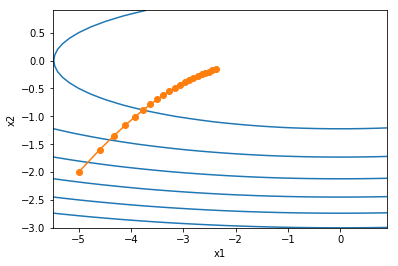

In [4]:
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


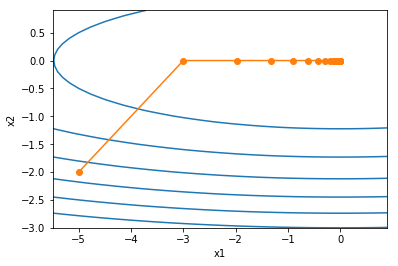

In [5]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [13]:
features, labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = tf.zeros((features.shape[1],1),dtype=tf.float32)
    s_b = tf.zeros(1,dtype=tf.float32)
    return (s_w, s_b)

def adagrad(params, states, hyperparams,grads):
    eps = 1e-6
    i=0
    for p, s in zip(params, states):
        s += (grads[i]**2)
        p.assign_sub(hyperparams['lr']*grads[i]/tf.sqrt(s+eps))
        i+=1

loss: 0.255291, 1.154072 sec per epoch


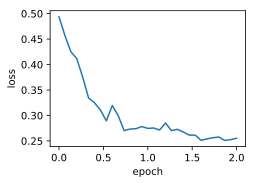

In [20]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.01}, features, labels)

In [21]:
from tensorflow.keras import optimizers
trainer = optimizers.Adagrad(learning_rate=0.01)

loss: 1.511836, 1.368635 sec per epoch


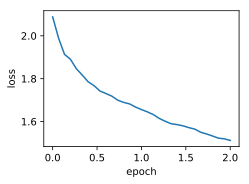

In [22]:
d2l.train_tensorflow2_ch7(trainer, {'lr': 0.01},
                    features, labels)